In [1]:
!pip install xgboost

In [2]:
# Initial imports
import pandas as pd
import numpy as np
from datetime import datetime
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the ventas_linea.csv dataset.
ventas_df = pd.read_csv('./final_ventas.csv')
ventas_df

,name,brand,month,qty,price_unit,total_sales
0,ALLENDE (QRO),SAM,December,253,3575.055344,904489.001910
1,ALLENDE (QRO),SAM,January,237,3510.548766,832000.057569
2,ALLENDE (QRO),SAM,November,190,3891.198695,741901.208609
3,ALLENDE (QRO),SAM,September,182,4025.918610,729146.389795
4,ALLENDE (QRO),SAM,May,140,4572.413284,640137.859691
...,...,...,...,...,...,...
3461,BOULEVARES (QRO),I-MOBIL,July,1,240.517241,240.517241
3462,PARQUE (QRO),I-MOBIL,July,1,240.517241,240.517241
3463,ALAMEDA (QRO),I-MOBIL,July,1,240.517241,240.517241
3464,PARQUE (CELAYA),I-MOBIL,May,1,240.517241,240.517241


In [4]:
# Convert categorical features to one-hot encoding
ventas_df = pd.get_dummies(ventas_df, columns=["name", "brand", "month"])

# Split the data into dependent variable y and independent variables X
y = ventas_df["qty"]
X = ventas_df.drop(columns=["qty", "total_sales", "price_unit"])
ventas_df

,qty,price_unit,total_sales,name_ALAMEDA (QRO),name_ALLENDE (CELAYA),name_ALLENDE (QRO),name_ANDADOR (CELAYA),name_ANTEA (QRO),name_BOULEVARES (QRO),name_CONSTITUYENTES (QRO),...,month_August,month_December,month_February,month_January,month_July,month_June,month_May,month_November,month_October,month_September
0,253,3575.055344,904489.001910,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,237,3510.548766,832000.057569,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,190,3891.198695,741901.208609,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,182,4025.918610,729146.389795,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,140,4572.413284,640137.859691,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3461,1,240.517241,240.517241,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
3462,1,240.517241,240.517241,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3463,1,240.517241,240.517241,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3464,1,240.517241,240.517241,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


### LInear Regression

In [5]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model and fit it to the training data
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions using the trained model on the testing set
y_pred = model.predict(X_test)


In [6]:
# Evaluate the model using MSE, RMSE, and R-squared
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print('MSE:', mse)
print('RMSE:', rmse)
print('R-squared:', r2)

MSE: 3.2742749224648484e+26
RMSE: 18094957646993.4
R-squared: -8.087362670241279e+23


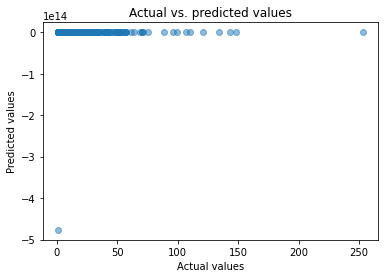

In [7]:
# Make predictions on new data
plt.scatter(y_test, y_pred, alpha=0.5)

# Set the axis labels
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Actual vs. predicted values')
plt.show()

### Random Forest Regression

In [8]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest Regression model and fit it to the training data
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions using the trained model on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [9]:

print("MSE:", mse)
print("RMSE:", rmse)
print("R-squared:", r2)

MSE: 131.10976772334294
RMSE: 11.450317363433335
R-squared: 0.6761627333383604


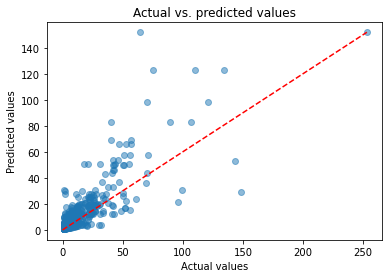

In [10]:
# Make predictions on new data
plt.scatter(y_test, y_pred, alpha=0.5)

# Add a line showing perfect correlation
plt.plot([0, max(y_test)], [0, max(y_pred)], '--', color='red')

# Set the axis labels
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Actual vs. predicted values')
plt.show()

### XGBoost regression

In [11]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an XGBoost regression model and fit it to the training data
model = XGBRegressor(objective='reg:squarederror', random_state=42)
model.fit(X_train, y_train)

# Make predictions using the trained model on the testing set
y_pred = model.predict(X_test)
y_pred

array([ 3.36453176e+00,  1.42348108e+01,  1.90099466e+00,  3.93351579e+00,
        3.73245049e+00,  1.11287200e+00,  1.66842422e+01,  3.39636192e+01,
        3.67250872e+00,  3.86426735e+01,  1.18868607e+02,  1.49915159e+00,
        1.02511177e+01,  8.89982605e+00,  3.89438319e+00,  4.47246933e+00,
        3.57753932e-01, -4.49205875e-01,  2.74829769e+00,  7.50130272e+00,
        3.42082787e+00,  8.13223839e+00,  4.16144037e+00,  3.30219340e+00,
        5.06116962e+00,  2.75029373e+00,  2.67518282e+00,  9.25736904e+00,
        2.53779888e+01, -3.04303735e-01,  1.90829587e+00,  4.02480030e+00,
        2.35600300e+01,  4.58719788e+01,  6.51753426e+00,  4.57682467e+00,
        2.29798079e+00,  8.67749214e-01, -1.73025239e+00, -1.10285306e+00,
       -2.18025908e-01,  4.74407234e+01,  2.67535000e+01,  1.11531086e+01,
        2.71384072e+00,  3.71654224e+00,  4.10376072e+00,  8.60063493e-01,
        4.72215509e+00,  2.40440682e-01,  2.86889529e+00,  3.55163813e+00,
        7.93978643e+00,  

In [12]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R-squared: {r2}")

MSE: 105.98543913786135
RMSE: 10.294922978724093
R-squared: 0.7382190853334275


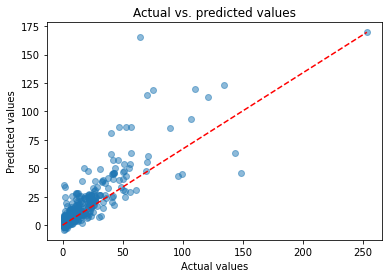

In [13]:
# Make predictions on new data
plt.scatter(y_test, y_pred, alpha=0.5)

# Add a line showing perfect correlation
plt.plot([0, max(y_test)], [0, max(y_pred)], '--', color='red')

# Set the axis labels
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Actual vs. predicted values')
plt.show()

In [14]:
selected_features = ['name_ALAMEDA (QRO)', 'name_ALLENDE (CELAYA)',
       'name_ALLENDE (QRO)', 'name_ANDADOR (CELAYA)', 'name_ANTEA (QRO)',
       'name_BOULEVARES (QRO)', 'name_CONSTITUYENTES (QRO)',
       'name_CORREGIDORA 2 (QRO)', 'name_CORREGIDORA 3 (QRO)',
       'name_CORREGIDORA 4 (QRO)', 'name_FIESTA (IRAPUATO)',
       'name_GALERIAS (QRO)', 'name_GUERRERO (QRO)', 'name_HIDALGO (CELAYA)',
       'name_HIDALGO 2 (CELAYA)', 'name_LA CRUZ (QRO)',
       'name_LA VICTORIA (QRO)', 'name_LEON CENTRO (LEON)',
       'name_MADERO (LEON)', 'name_MADERO (QRO)', 'name_MAYOREO (QRO)',
       'name_OBREGON (LEON)', 'name_PARQUE (CELAYA)', 'name_PARQUE (QRO)',
       'name_PLAZA MAYOR (LEON)', 'name_PLAZA PATIO (QRO)',
       'name_PORTAL (QRO)', 'name_URBAN (QRO)', 'name_VALLARTA (VTA)',
       'name_VIA ALTA SUR (LEON)', 'brand_ACER', 'brand_ALC', 'brand_ALCATEL',
       'brand_APPLE', 'brand_BLU', 'brand_CORN', 'brand_DASH', 'brand_DOPPIO',
       'brand_EPIK', 'brand_HISENSE', 'brand_HONOR', 'brand_HUAWEI',
       'brand_I-MOBIL', 'brand_INFINITI', 'brand_KODAK', 'brand_LANIX',
       'brand_LG', 'brand_MOTO', 'brand_MOTOROLA', 'brand_NOKIA',
       'brand_ONEPLUS', 'brand_OPPO', 'brand_REALME', 'brand_SAM',
       'brand_SAMSUNG', 'brand_SENWA', 'brand_SKY', 'brand_SOYEALINK',
       'brand_TCL', 'brand_VIVO', 'brand_XIAOMI', 'brand_ZTE', 'month_April',
       'month_August', 'month_December', 'month_February', 'month_January',
       'month_July', 'month_June', 'month_May', 'month_November',
       'month_October', 'month_September']

In [15]:
# select only relevant columns from ventas_df
X = X[selected_features]

# use the trained model to make predictions on new data
predicted_sales = model.predict(X)

# add the predicted sales as a new column to the new data
X['predicted_sales'] = predicted_sales
predicted_sales

array([169.70322   , 226.35962   , 178.87573   , ...,   2.098968  ,
         0.35775393,   4.9041705 ], dtype=float32)

In [16]:
# sort the data by predicted sales in descending order and take the top 5 rows
top_10 = X.sort_values(by='predicted_sales', ascending=False).head(10)

# display the top 10 phones and their predicted quantities
print(top_10)

    name_ALAMEDA (QRO)  name_ALLENDE (CELAYA)  name_ALLENDE (QRO)  \
1                    0                      0                   1   
9                    0                      0                   1   
11                   0                      0                   0   
2                    0                      0                   1   
3                    0                      0                   1   
0                    0                      0                   1   
52                   0                      0                   1   
10                   0                      0                   1   
13                   0                      0                   0   
38                   0                      0                   1   

    name_ANDADOR (CELAYA)  name_ANTEA (QRO)  name_BOULEVARES (QRO)  \
1                       0                 0                      0   
9                       0                 0                      0   
11                      0     

In [17]:
pivot_table = pd.pivot_table(X, 
                             values='predicted_sales', 
                             index=selected_features[0], 
                             columns=[selected_features[1], selected_features[2]])
print(pivot_table.head())

name_ALLENDE (CELAYA)          0                    1
name_ALLENDE (QRO)             0          1         0
name_ALAMEDA (QRO)                                   
0                       8.865124  28.662657  7.016048
1                      11.446415        NaN       NaN


In [18]:
# get user input for branch and month
branch = input("Enter branch name: ")
month = input("Enter month: ")

# filter the X dataframe based on user input
filtered_X = X[(X[selected_features] == 1) & (X[selected_features] == 1) & (X[selected_features] == 1)]

# create pivot table using filtered dataframe
pivot_table = pd.pivot_table(filtered_X, 
                             values='predicted_sales', 
                             index=selected_features[0], 
                             columns=[selected_features[1], selected_features[2]])

# print pivot table
print(pivot_table.head())

Enter branch name: name_ALLENDE (CELAYA)
Enter month: month_October
Empty DataFrame
Columns: []
Index: []
